In [6]:
import numpy as np
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [22]:
!wget -O obraz.jpg http://51.91.120.89/extras/doda.jpg

--2022-06-12 08:48:35--  http://51.91.120.89/extras/doda.jpg
Connecting to 51.91.120.89:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 39533 (39K) [image/jpeg]
Saving to: ‘obraz.jpg’

obraz.jpg           100%[===================>]  38.61K  --.-KB/s    in 0.02s   

2022-06-12 08:48:35 (1.96 MB/s) - ‘obraz.jpg’ saved [39533/39533]



In [23]:
model = ResNet50()

In [24]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_3[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

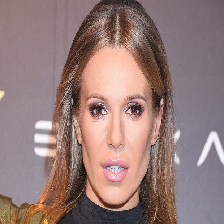

In [25]:
# wczytanie grafiki i reskalowanie
img = load_img("obraz.jpg", target_size=(224,224) )
img

In [26]:
# zamiania obraz na postać macierzową
x = img_to_array(img)
x.shape

(224, 224, 3)

In [27]:
# dodajemy wymiar ilosci próbek
x = x.reshape(1, 224, 224, 3)

In [28]:
x = preprocess_input(x)
predict = model.predict(x)

In [29]:
decode_predictions(predict, top=10)

[[('n03000247', 'chain_mail', 0.62168896),
  ('n04584207', 'wig', 0.13136081),
  ('n02895154', 'breastplate', 0.057124432),
  ('n03770439', 'miniskirt', 0.025898913),
  ('n03584829', 'iron', 0.017298741),
  ('n03146219', 'cuirass', 0.015247665),
  ('n03045698', 'cloak', 0.009943561),
  ('n03404251', 'fur_coat', 0.008150711),
  ('n04532106', 'vestment', 0.00797877),
  ('n04350905', 'suit', 0.007766248)]]